# DBSCAN Algorithm

## Importing libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

## Reading data & preprocessing

In [13]:
df = pd.read_csv('football_data.csv').set_index('Unnamed: 0')
df_1=df
df_1.loc[:,'Weight'] = df_1['Weight'].apply(lambda x: float(str(x).split('lbs')[0]) )
df_2 = df_1[df_1['Height'].isna()==False]
df_2.loc[:,'Height'] = df_2['Height'].apply(lambda x: float(str(x).split('\'')[0])*12 + float(str(x).split('\'')[1])  )
df=df_2

In [14]:
df.shape

(18159, 88)

## Selecting only numeric attributes & scaling it

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
scaler = MinMaxScaler()
newdf = df.select_dtypes(include=numerics)

 

newdf.insert(0, "Name", list(df.Name), True)
newdf=newdf.drop(columns = ['ID','Jersey Number','Age'])

 


X = scaler.fit_transform(newdf.iloc[:,1:])
y = np.array(newdf.iloc[:,0])

## Applying PCA

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X))
X=reduced.to_numpy()

## Testing DBSCAN for parameters  : eps & minpoints

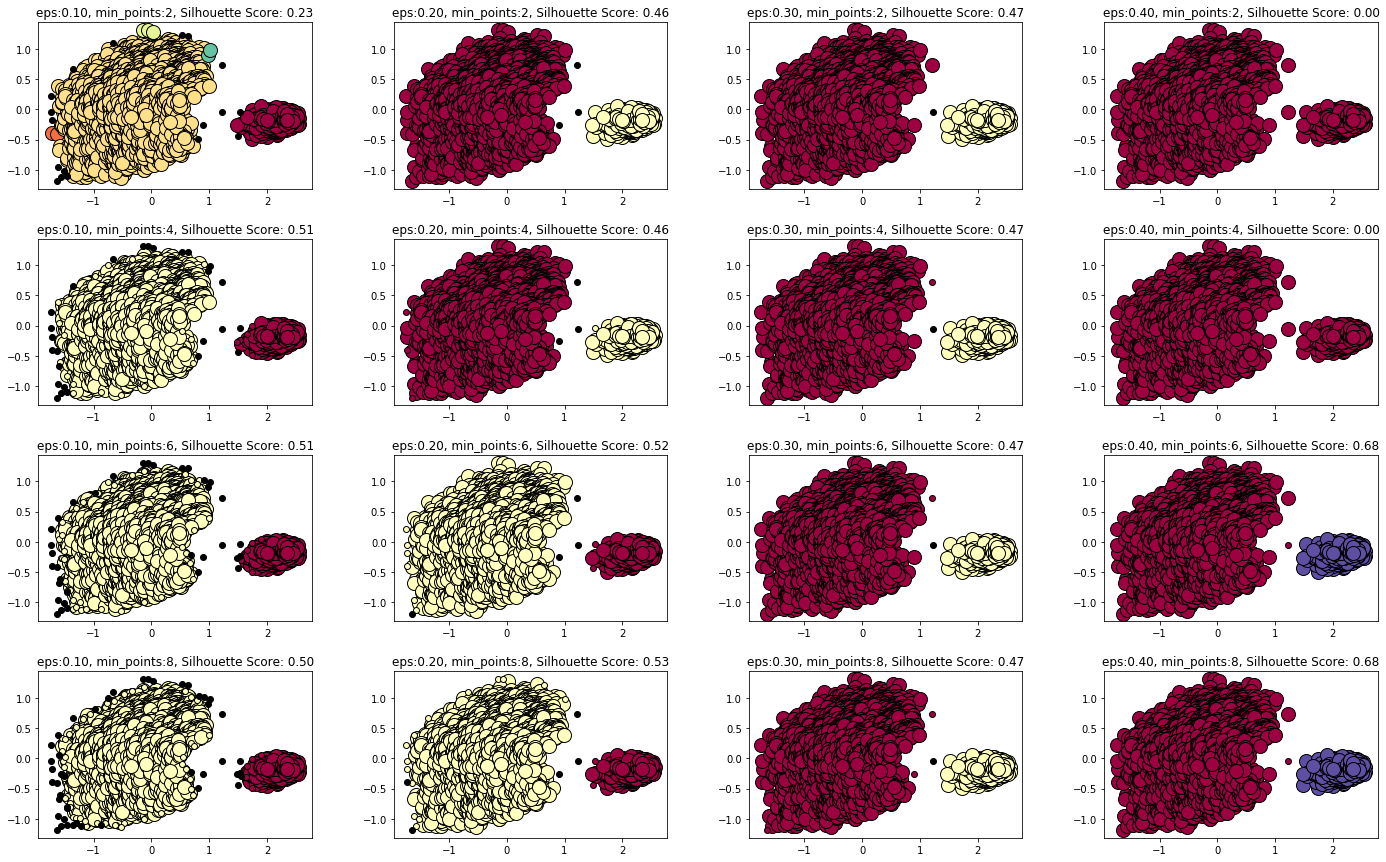

In [29]:
plt.figure(1, figsize=(24,15))

eps_v=[0.1,0.2,0.3,0.4]
minsamples=[2,4,6,8]
kv=1
for j in range(4):
    for i in range(1,5):
#         print(eps_v[i-1])
        db = DBSCAN(eps=eps_v[i-1],min_samples = minsamples[j],n_jobs=3)
        db.fit_predict(reduced)
        labels=db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
        X=reduced.to_numpy()
        ax = plt.subplot(4, 4, kv)
        plt.subplots_adjust(wspace=0.3,hspace=0.3)
        kv+=1
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
        # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
#             ax.legend(loc='best')
            xy = X[class_member_mask & ~core_samples_mask]
            ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)
            if n_clusters_>1:
                sscore=metrics.silhouette_score(X, labels)
            else:
                sscore=0.0
            ax.set_title('eps:%.2f, min_points:%d, Silhouette Score: %.2f' % (eps_v[i-1],minsamples[j],sscore))
#             ax.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)
    
# plt.title('Estimated number of clusters: %d' % n_clusters_)

*Black points represent the noise for a given set of parameters.*

**Based on the silhouette score of above graphs, we got a maximum value for epsilon: 0.40 & min_points: 6 , but even outliers got included in the clusters as is visible,so decided to go with eps:0.20 & min_pts: 6 as even the outliers are represented.**

## DBSCAN

In [90]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2,min_samples = 6,n_jobs=3)
db.fit_predict(X)

array([-1,  1,  1, ...,  1,  1,  1])

In [91]:
labels=db.labels_

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [92]:
np.unique(labels)
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

## Plotting the final cluster

Estimated number of clusters: 2
Estimated number of noise points: 4
Silhouette Coefficient: 0.518


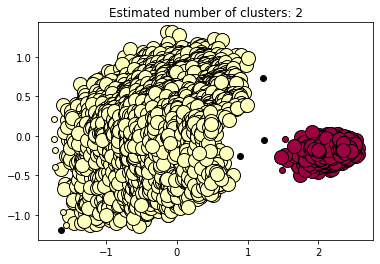

In [43]:
from sklearn import metrics
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Analysis

- Outliers were detected as blackpoints on the graph, which on enumerating came out to be L.Messi as was expected from the Data Visualisation task. For the other three we can observe that their overall score was least as per their position implying that they are the weakest player in the bunch

In [88]:
outliers=[]
for i in enumerate(labels):
    if(i[1]==-1):
        outliers.append(i[0])

In [89]:
for out in outliers:
    print(df.iloc[out,[1,6,20]].to_numpy())

['L. Messi' 94 'RF']
['Guo Quanbo' 60 'GK']
['J. McCombe' 53 'CB']
['N. Christoffersson' 47 'ST']


In [85]:
gk=[]
oth=[]
for i in enumerate(labels):
    if(i[1]==0):
        gk.append(i[0])
    if(i[1]==1):
        oth.append(i[0])
gk=y[gk]
oth=y[oth]

In [86]:
cluster_0=[]
cluster_1=[]
for name in gk:
    cluster_0.append(str(df.loc[df.Name == name,'Position'].to_numpy()[0]))
for name in oth:
    cluster_1.append(str(df.loc[df.Name == name,'Position'].to_numpy()[0]))

In [87]:
from collections import Counter
print('Cluster Color Red',sorted(Counter(cluster_0).items(), key=lambda x: x[1], reverse=True)[:5])
print('Cluster Color Yellow',sorted(Counter(cluster_1).items(), key=lambda x: x[1], reverse=True)[:5])

Cluster Color Red [('GK', 1918), ('ST', 16), ('CB', 12), ('CDM', 9), ('RB', 8)]
Cluster Color Yellow [('ST', 2126), ('CB', 1725), ('CM', 1368), ('LB', 1298), ('RB', 1280)]


- The actual clusters have a good intra class similarity as is evident from the scatter plot.
- From the data itself in the cluster , we can see there are two clusters formed, one with the  maximum number of goalkeepers and the other with the remaining position players.